In [1]:
import numpy as np
import random
import torch
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
data_dir="/mnt/c/Users/hangh/Dropbox/Research/nlpprojectoncdpdata/data/"

In [3]:
supplychain_dir=data_dir+"SupplyChain/"
supplychain_filename_list= [f for f in os.listdir(supplychain_dir) if os.path.isfile(os.path.join(supplychain_dir, f))]
print(supplychain_filename_list)

investor_dir=data_dir+"Investor/"
investor_filename_list= [f for f in os.listdir(investor_dir) if os.path.isfile(os.path.join(investor_dir, f))]
print(investor_filename_list)

['Supply Chain CDP CC 2010_Public Data.xlsx', 'Supply Chain CDP CC 2011_Public Data.xlsx', 'Supply Chain CDP CC 2012_Public Data.xlsx', 'Supply Chain CDP CC 2013_Public Data.xlsx', 'Supply Chain CDP CC 2014_Public Data.xlsx', 'Supply Chain CDP CC 2015_Public Data.xlsx', 'Supply Chain CDP CC 2016_Public Data.xlsx', 'Supply Chain CDP CC 2017_Public Data.xlsx', 'Supply Chain CDP CC 2018_Public Data.xlsx', 'Supply Chain CDP CC 2019_Public Data.xlsx', 'Supply Chain CDP CC 2020_Public Data.xlsx']
['Investor CDP 2010_Public Data.xlsx', 'Investor CDP 2011_Public Data.xlsx', 'Investor CDP 2012_Public Data.xlsx', 'Investor CDP 2013_Public Data.xlsx', 'Investor CDP 2014_Public data.xlsx', 'Investor CDP 2015_Public Data.xlsx', 'Investor CDP 2016_Public Data.xlsx', 'Investor CDP 2017_Public Data (with sector Qs).xlsx', 'Investor CDP 2018_Public Data.xlsx', 'Investor CDP 2019_Public Data.xlsx', 'Investor CDP 2020_Public Data.xlsx']


# 1 find the companies which have data in all years

In [39]:
# for filename in supplychain_filename_list:
filename=supplychain_filename_list[0]
df_dicts = pd.read_excel(supplychain_dir + filename, sheet_name=None) 
# print(df_dicts.keys())
company_list_year_list = []
for filename in supplychain_filename_list:
    print(filename)
    df_dicts = pd.read_excel(supplychain_dir + filename, sheet_name=None) 
    if "Summary" in df_dicts.keys():
        try:
            company_list_year_list.append(df_dicts["Summary"]["Company Name"].tolist())
        except KeyError:
            
             company_list_year_list.append(df_dicts["Summary"]["Organisation"].tolist())
    else:
        try:
            company_list_year_list.append(df_dicts["Summary Data"]["Organisation"].tolist())
        except KeyError:
                try:
                    company_list_year_list.append(df_dicts["Summary Data"]["Company Name"].tolist())
                except KeyError:
                    try:
                        company_list_year_list.append(df_dicts["Summary Data"]["account_name"].tolist())
                    except KeyError:
                        company_list_year_list.append(df_dicts["Summary Data"]["Organization"].tolist())
                        
            
# print(len(df.head()))
# print(df.head())

# print(df.shape)
# print(df.describe())
    

Supply Chain CDP CC 2010_Public Data.xlsx
Supply Chain CDP CC 2011_Public Data.xlsx
Supply Chain CDP CC 2012_Public Data.xlsx
Supply Chain CDP CC 2013_Public Data.xlsx
Supply Chain CDP CC 2014_Public Data.xlsx
Supply Chain CDP CC 2015_Public Data.xlsx
Supply Chain CDP CC 2016_Public Data.xlsx
Supply Chain CDP CC 2017_Public Data.xlsx
Supply Chain CDP CC 2018_Public Data.xlsx
Supply Chain CDP CC 2019_Public Data.xlsx
Supply Chain CDP CC 2020_Public Data.xlsx


In [40]:
# find the common companies in all years
common_companies = set(company_list_year_list[0])
for company_list in company_list_year_list:
    common_companies = common_companies.intersection(set(company_list))
print(common_companies)

{'Tessy Plastics', 'AptarGroup', 'Porton', 'DANFOSS', 'ABM INDUSTRIES INC', 'Bloomberg', 'DOMINGUES PAES EMPRESA DE SEGURANCA'}


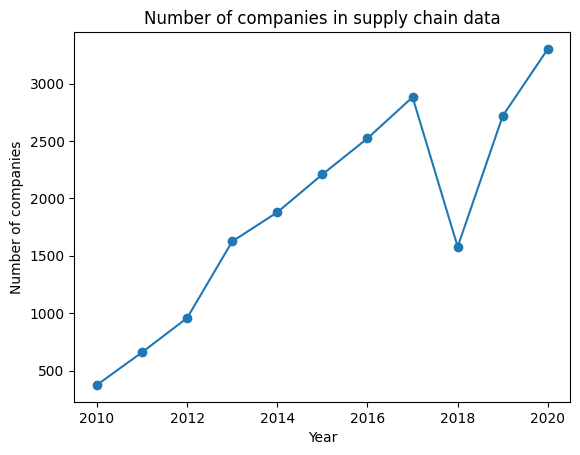

In [41]:
# count the number of companies in each year
company_count_list = []
for company_list in company_list_year_list:
    company_count_list.append(len(company_list))
    
year_lisr=np.linspace(2010,2020,11)
plt.plot(year_lisr,company_count_list,"-o")
plt.xlabel("Year")
plt.ylabel("Number of companies")
plt.title("Number of companies in supply chain data")
plt.show()


{'IGARATIBA': 1, 'UNIHAN CORPORATION': 1, 'ANS Group': 1, 'Marvell Semiconductor Inc.': 1, 'Shamrock Technologies': 1, 'ASE Consulting': 1, 'Hewden Stuart Plc': 1, 'OCS Group UK Limited': 5, 'Unigen': 6, 'ANGEL GROUP LTD.': 1, 'Apacer Technology': 2, 'INTELCAV CARTÕES LTDA.': 2, 'Sanmina-SCI Corporation': 4, 'Chicony Power Technology Co.,Ltd. (DongGuan)': 2, 'Royal Mail Group': 7, 'Sir Robert McAlpine Ltd': 1, 'COMPEQ MANUFACTURING CO.,LTD': 1, 'Energy Savings Trust': 1, 'HITEC POWER PROTECTION': 1, 'ISOWAT MADE, S.L.': 1, 'NG Bailey': 3, 'INTERCALL': 3, 'THE NICHOLS GROUP LIMITED': 1, 'Unifosa Corp.': 2, 'ECS': 6, 'NCR Corporation': 4, 'Berry Plastics': 4, 'DELTA AIR LINES': 1, 'PC Partner Limited': 9, 'Ridge and Partners': 1, 'Top Victory Electronics(Fujian) Co. Ltd': 6, 'Tri National Inc.': 3, 'Bramble.cc Ltd': 1, 'GCS Global Closure Systems': 4, 'WIPAK OY': 1, 'YMCA Glasgow': 1, 'SERDISCOM, S.L.': 1, 'TURNER CONSTRUCTION COMPANY': 8, 'INEOS': 1, 'Vander Bend': 2, 'Avaya Communicati

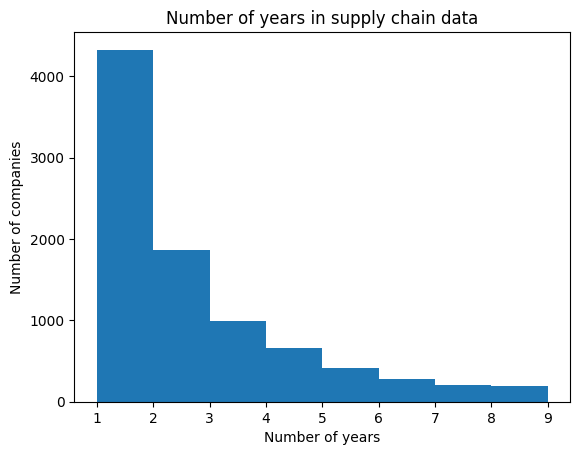

In [42]:
# count the occurance of each company in the data
company_count_dict = {}
for company_list in company_list_year_list:
    for company in company_list:
        if company in company_count_dict:
            company_count_dict[company] += 1
        else:
            company_count_dict[company] = 1
print(company_count_dict)

# plot the histogram of the number of companies
company_count_list = list(company_count_dict.values())
plt.hist(company_count_list, bins=range(1, 10))
plt.xlabel("Number of years")
plt.ylabel("Number of companies")
plt.title("Number of years in supply chain data")
plt.show()